In [1]:
import os
os.environ["PYTHONPATH"] = ""
os.environ["PATH"] = "/opt/app-root/src/for_snudda/bin:" + os.environ["PATH"]

In [1]:
cd "~/Snudda"

/home/ubuntu/Snudda


## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [2]:
!snudda init networks/net_10000 --size 10000 --overwrite

Creating config file
Network path: networks/net_10000
CreateConfig
Using 1 functional channels
Adding Striatum with 10000 neurons
Using cube for striatum
Creating cube mesh
File: networks/net_10000/mesh/Striatum-cube-mesh-0.0004989626526218353.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.0004989626526218353
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.0004989626526218353
Adding neurons: FSN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/ispn
Adding neurons: ChIN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon den

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [3]:
!snudda place networks/net_10000

Placing neurons
Network path: networks/net_10000
Using runID = 10
Using hdf5 version: latest
Parsing configuration file networks/net_10000/network-config.json
Using meshBinWidth 4.989626526218353e-05
Cube mesh, switching to serial processing.
No mesh cache file found (networks/net_10000/mesh/Striatum-cube-mesh-0.0004989626526218353.obj-49-cache.pickle)
Running in serial
Voxel mask: 15x14x14
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Processing x = 5
Processing x = 6
Processing x = 7
Processing x = 8
Processing x = 9
Processing x = 10
Processing x = 11
Processing x = 12
Processing x = 13
Processing x = 14
Fraction of border voxels: 0.0
Saving mesh cache file networks/net_10000/mesh/Striatum-cube-mesh-0.0004989626526218353.obj-49-cache.pickle
Calculation time: 0.24260051304008812 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.1 mm³
Using dimensions from config file
Addi

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this took about 9 hours

In [ ]:
!snudda detect networks/net_10000

Touch detection
Network path: networks/net_10000
Creating missing directory networks/net_10000/voxels
Created directory networks/net_10000/voxels
Using runID = 11
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 65866796, 'free': 58513052, 'used': 7353744}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/net_10000/network-config.json
Reading prototype for: FSN_0
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_1
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_2
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/MTC251001A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_3
Found cache file: /home/ubu

Prune the detected appositions to get the set of synapses. (~ 1 hour) 

In [3]:
!snudda prune networks/net_10000

Prune synapses
Network path: networks/net_10000
Using runID = 12
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/net_10000/log/network-detect-worklog.hdf5
Using default scratch path: networks/net_10000//temp/
Checking for merge file networks/net_10000//network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing bigMerge (lookup) for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/net_10000//voxels/network-putative-synapses-86.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_10000//voxels/network-putative-synapses-50.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_10000//voxels/network-putative-synapses-85.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_10000//voxels/network-putative-synapses-49.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_10000//voxels/network-putative-synapses-80.hdf5
[0, 521, 20971520, 0

Generate external input events for the network. A 3 second duration of the simulation is reserved.
( ~10 minutes)

In [4]:
!snudda input networks/net_10000 --input snudda/data/config/input-tinytest-v6.json --time 3.0

Setting up inputs, assuming input.json exists
Using runID = 13
Writing input spikes to networks/net_10000/input-spikes.hdf5
Time = 3.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/net_10000/network-pruned-synapses.hdf5
Loading input configuration from snudda/data/config/input-tinytest-v6.json
Reading neuron postions
Loading networks/net_10000/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.08014143200125545
Reading config file networks/net_10000/network-config.json
IPYTHON_PROFILE = None
No IPYTHON_PROFILE enviroment variable set, running in serial
Running makeChannelSpikeTrains
Running makeNeuronInputParallell
Clearing channelSpikesList, thus all neurons will have their own mother process for each input
Running input generation in serial
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Generating 154 inputs for dSPN_0
Gathering 0 - Cortica

### Compile MOD files

In [8]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

Run the simulation. Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation.  
**NOTE**: this takes about 15 minutes on a common desktop.

In [5]:
!snudda simulate networks/net_10000/ --time 0.1 --input networks/net_10000/input-spikes.hdf5 --voltOut networks/net_10000/simulation/volt.txt

--No graphics will be displayed.
Using input file networks/net_10000/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/net_10000/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/net_10000', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/net_10000/simulation/volt.txt', volumeID=None)
Using networkFile: networks/net_10000/network-pruned-synapses.hdf5
Using inputFile: networks/net_10000/input-spikes.hdf5
Using logFile: networks/net_10000/log/network-simulation-log.txt
I am node 0
Worker 0: Loading network from networks/net_10000/network-pruned-synapses.hdf5
Loading networks/net_10000/network-pruned-synapses.hdf5
Loading config data from HDF5
10000 neurons with 6362271 synapses and 1459 gap junctions
Load done. 6.99131850339

## Plot simulation results

In [4]:
%matplotlib inline
#%matplotlib widget
#from ipywidgets import *
#import matplotlib.pyplot as plt 


See the spike raster plot for all cell types.

In [5]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/net_10000/simulation/network-output-spikes-666.txt"
networkFile = "networks/net_10000/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

OSError: networks/net_10000/simulation/network-output-spikes-666.txt not found.

Check voltage traces for randomly the selected cells.

In [ ]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/net_10000/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/net_10000/network-pruned-synapses.hdf5"
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Analyze spatial distribution of the synapses for each cell type.

Loading networks/net_10000/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/net_10000/network-pruned-synapses.hdf5
Loading config data from HDF5
10000 neurons with 6362271 synapses and 1459 gap junctions
Load done. 1.6472581538837403
Number of neurons: 10000
Synapse row 0 - 0.0 % time: 0.36289270292036235 seconds
Synapse row 1000000 - 15.717658050089348 % time: 3.608636165037751 seconds
Synapse row 1893711 - 29.764701943692746 % time: 6.609634059946984 seconds
Synapse row 2787423 - 43.811761554954195 % time: 9.620923825073987 seconds
Synapse row 3681135 - 57.85882116621565 % time: 12.687102956930175 seconds
Synapse row 4574847 - 71.9058807774771 % time: 16.223170910961926 seconds
Synapse row 5468559 - 85.95294038873855 % time: 19.038631661096588 seconds
Created connection matrix 21.5941520400811 seconds
GJ row : 0 - 0.0 %  time : 0.041052269050851464 seconds
Created gap junction connection matrix 0.058

/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2606754.]
Rejected (too large z-depth): 7393252
P(d<5e-05)=0.06503934174770151
P(d<0.0001)=0.051574371395435074


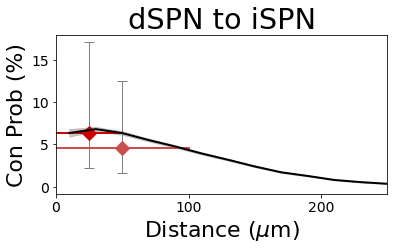

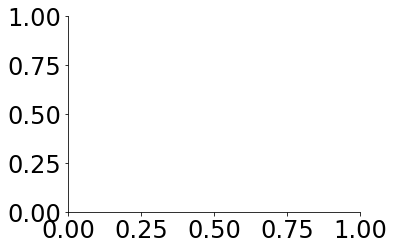

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.png
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2614839.]
Rejected (too large z-depth): 7383111
P(d<5e-05)=0.2714246686324199
P(d<0.0001)=0.20957304080183095


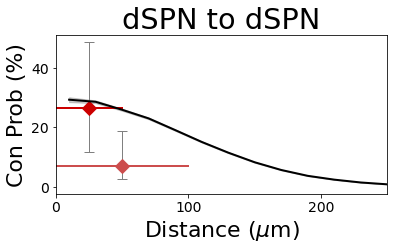

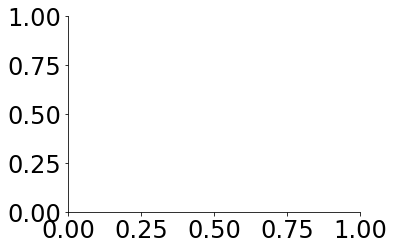

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.png
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2609330.]
Rejected (too large z-depth): 7390670
P(d<5e-05)=0.2698110719734785
P(d<0.0001)=0.20246932382435345


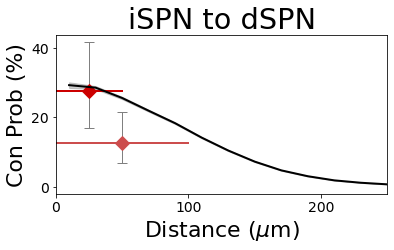

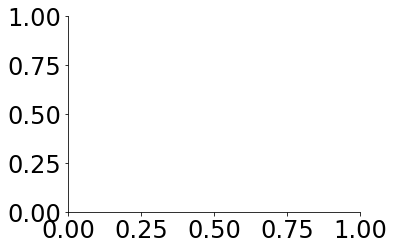

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.png
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2596903.]
Rejected (too large z-depth): 7400975
P(d<5e-05)=0.3363502101715454
P(d<0.0001)=0.27873829805178374


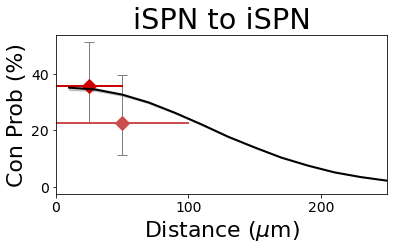

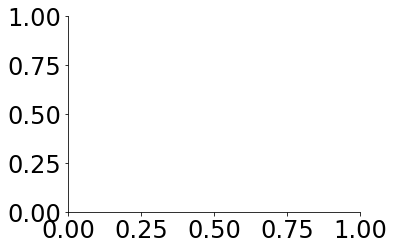

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.png
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [167898.]
Rejected (too large z-depth): 476088
P(d<0.0001)=0.509064449064449
P(d<0.00015)=0.41052152589933516
P(d<0.00025)=0.23108433161065994


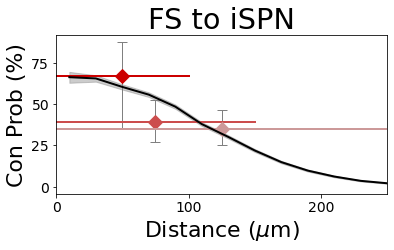

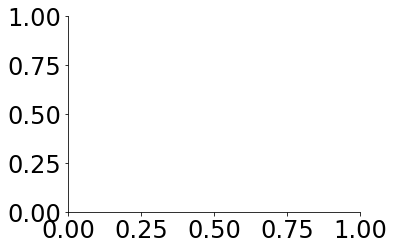

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.png
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [168944.]
Rejected (too large z-depth): 475042
P(d<0.0001)=0.7015277605266427
P(d<0.00015)=0.5841934831005869
P(d<0.00025)=0.3406401066844474


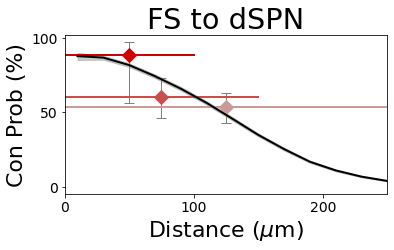

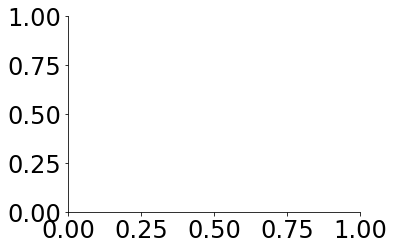

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.png
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 133/133
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [4818.]
Rejected (too large z-depth): 12738
P(d<0.00025)=0.22558340535868626


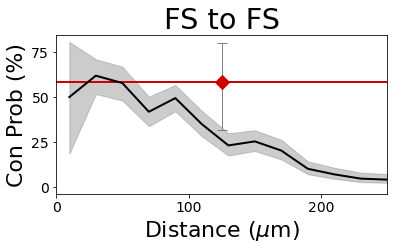

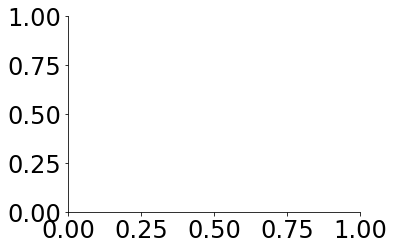

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.png
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 133/133
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [4818.]
Rejected (too large z-depth): 12738
P(d<0.00025)=0.09075194468452895
P(d<0.00025)=0.09075194468452895


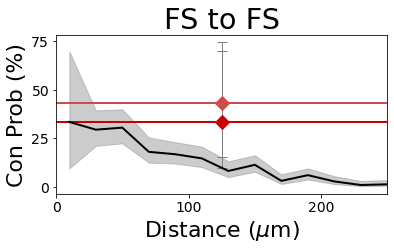

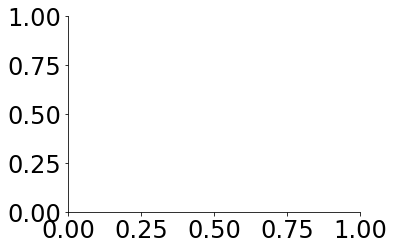

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.png
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections
Requested: 10000000.0 calculated [87770.]
Rejected (too large z-depth): 256012
P(d<0.00025)=0.06148069397633966


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


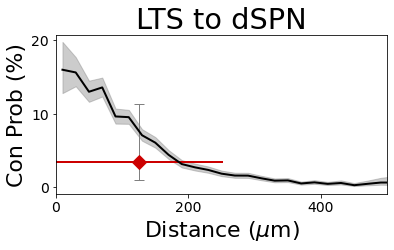

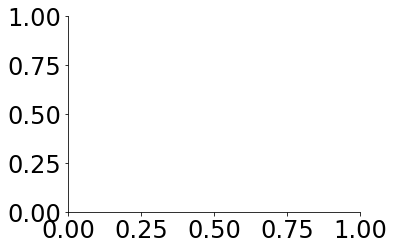

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.png
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [87446.]
Rejected (too large z-depth): 256336
P(d<0.00025)=0.04902377384653233


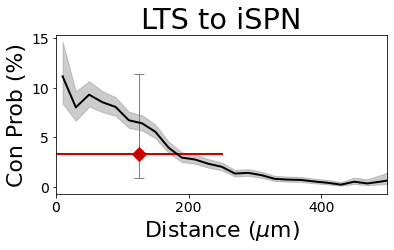

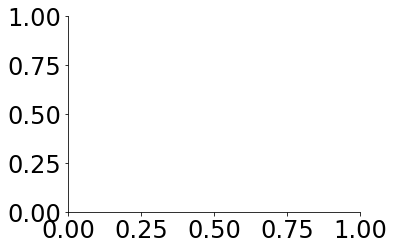

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.png
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 71/71
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2443.]
Rejected (too large z-depth): 7000
P(d<0.00025)=0.05843071786310518


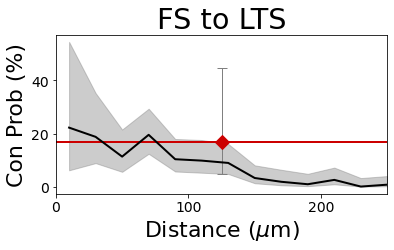

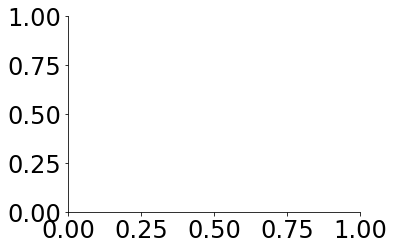

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.png
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 71/71
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2032.]
Rejected (too large z-depth): 5920


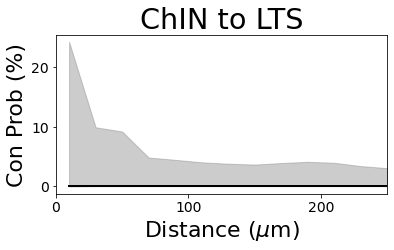

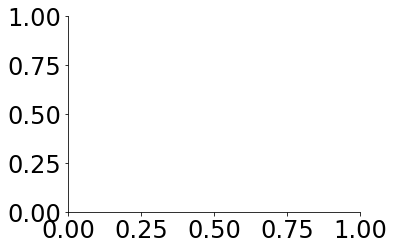

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.png
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [140652.]
Rejected (too large z-depth): 401652
P(d<0.00025)=0.0


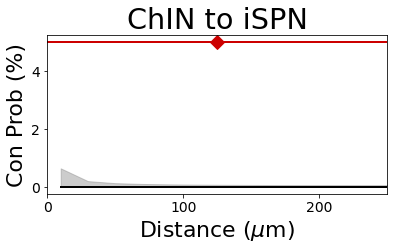

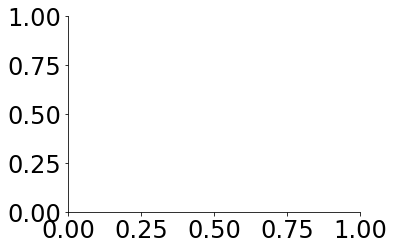

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.png
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 4842/4842
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [140932.]
Rejected (too large z-depth): 401372
P(d<0.00025)=0.0


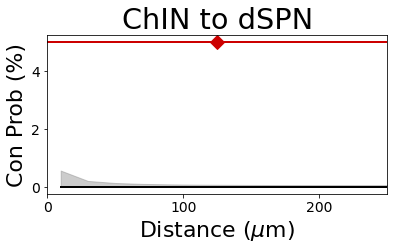

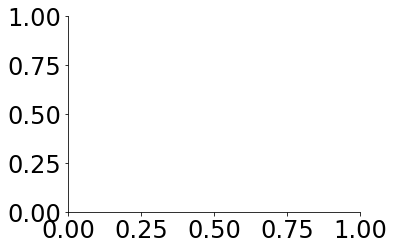

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.png
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 112/112
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2032.]
Rejected (too large z-depth): 5920


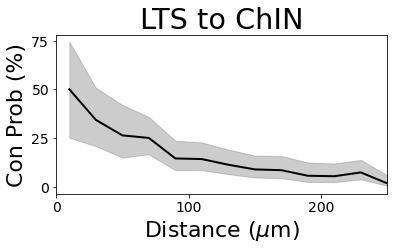

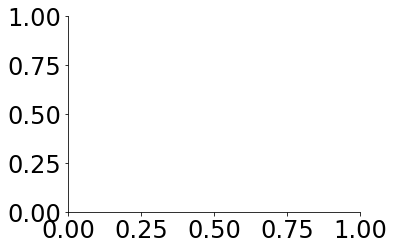

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.png
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 133/133
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [3805.]
Rejected (too large z-depth): 11091


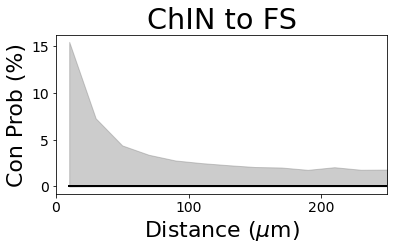

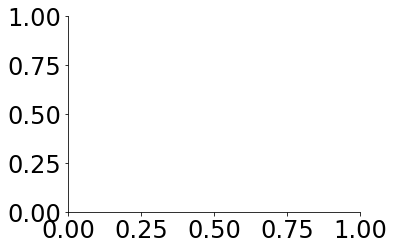

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.png
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 112/112
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [140932.]
Rejected (too large z-depth): 401372


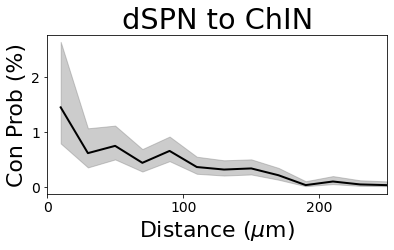

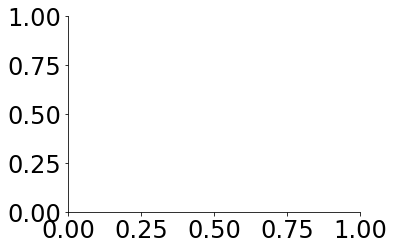

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.png
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 112/112
Counting connections
Requested: 10000000.0 calculated [140652.]
Rejected (too large z-depth): 401652


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


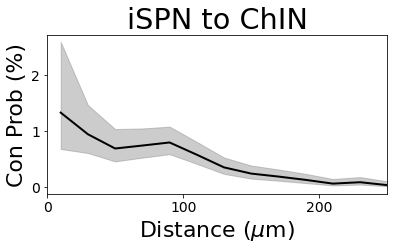

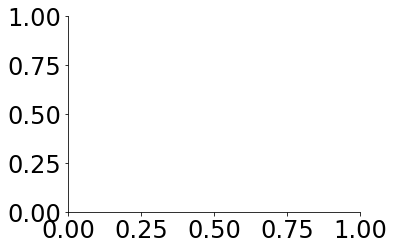

Wrote networks/net_10000/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.png


In [6]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/net_10000",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)



Simulation analysis plots are saved as PDF files in the directory `networks/net_10000/figures`.

In [ ]:
!ls networks/net_10000/figures/*.pdf

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).